In [ ]:
!pip install prophet


In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MaunaLoaDailyTemps.csv')
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1821 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1821 non-null   int64  
 5   Sunset   1821 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.5+ KB


In [ ]:
df.head()


,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [ ]:
df=df[["DATE","AvgTemp"]]
df.head()

,DATE,AvgTemp
0,1/1/2014,40.0
1,1/2/2014,43.0
2,1/3/2014,41.0
3,1/4/2014,37.0
4,1/5/2014,31.0


Change Column Names for FB Prophet

In [ ]:
df.columns = ['ds','y']


In [ ]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
1816,2018-12-26,40.0
1817,2018-12-27,39.0
1818,2018-12-28,40.0
1819,2018-12-29,42.0
1820,2018-12-30,46.0


Plot Your Data

<Axes: xlabel='ds'>

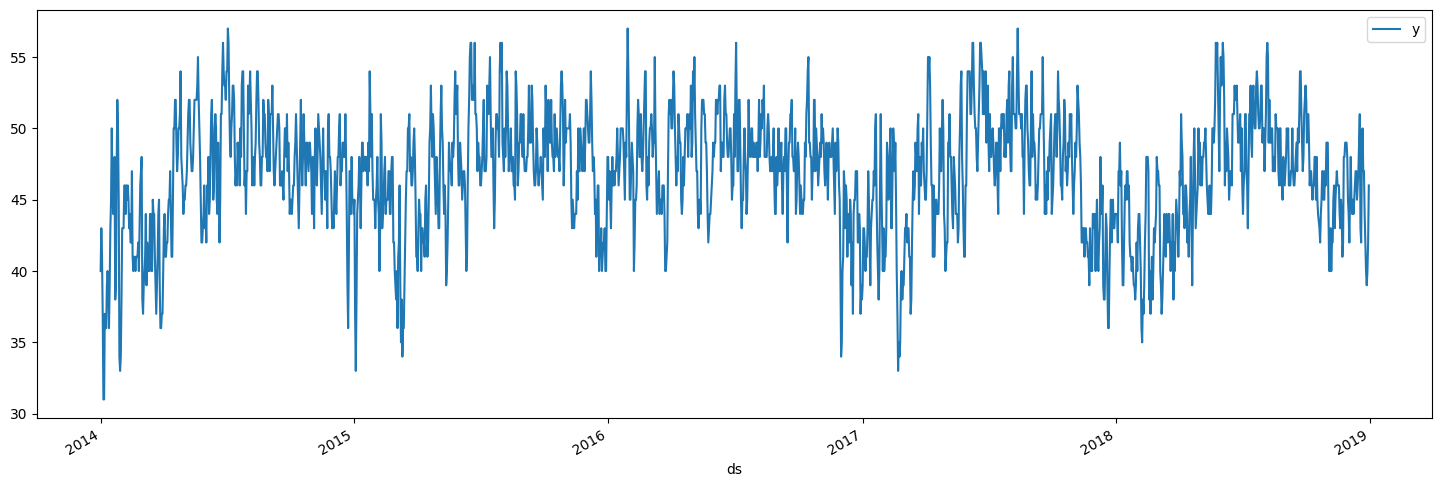

In [ ]:
df.plot(x='ds',y='y',figsize=(18,6))


In [ ]:
len(df)

1821

Train, Test Split


In [ ]:
train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-365:]

Start Making Predictions

In [ ]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_5g0os1a/tltw637f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_5g0os1a/tr76dha3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25638', 'data', 'file=/tmp/tmp_5g0os1a/tltw637f.json', 'init=/tmp/tmp_5g0os1a/tr76dha3.json', 'output', 'file=/tmp/tmp_5g0os1a/prophet_modelomvdhg1_/prophet_model-20240821103929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:39:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:39:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1816,2018-12-25,46.192062,36.729191,45.576709,44.783954,47.711541,-4.948818,-4.948818,-4.948818,-0.145826,-0.145826,-0.145826,-4.802992,-4.802992,-4.802992,0.0,0.0,0.0,41.243244
1817,2018-12-26,46.191314,37.022469,45.985814,44.776262,47.716763,-4.904014,-4.904014,-4.904014,-0.052643,-0.052643,-0.052643,-4.851371,-4.851371,-4.851371,0.0,0.0,0.0,41.287300
1818,2018-12-27,46.190565,36.899509,45.904519,44.767428,47.721985,-4.772865,-4.772865,-4.772865,0.098682,0.098682,0.098682,-4.871547,-4.871547,-4.871547,0.0,0.0,0.0,41.417700
1819,2018-12-28,46.189817,37.384386,46.440589,44.762458,47.727315,-4.436219,-4.436219,-4.436219,0.426907,0.426907,0.426907,-4.863127,-4.863127,-4.863127,0.0,0.0,0.0,41.753597
1820,2018-12-29,46.189068,37.152702,45.783730,44.757489,47.736046,-4.831995,-4.831995,-4.831995,-0.005789,-0.005789,-0.005789,-4.826206,-4.826206,-4.826206,0.0,0.0,0.0,41.357073


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1816,2018-12-25,41.243244,36.729191,45.576709
1817,2018-12-26,41.287300,37.022469,45.985814
1818,2018-12-27,41.417700,36.899509,45.904519
1819,2018-12-28,41.753597,37.384386,46.440589
1820,2018-12-29,41.357073,37.152702,45.783730


In [ ]:
test.tail()


,ds,y
1816,2018-12-26,40.0
1817,2018-12-27,39.0
1818,2018-12-28,40.0
1819,2018-12-29,42.0
1820,2018-12-30,46.0


USING BUILT-IN FB PROPHET VISUALIZATION

*   List item
*   List item



In [ ]:
plot_plotly(m ,forecast)


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [ ]:
plot_components_plotly(m, forecast)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Evaluate Your Model


In [ ]:
from statsmodels.tools.eval_measures import rmse


In [ ]:
predictions = forecast.iloc[-365:]['yhat']


In [ ]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  3.460854304152485
Mean Value of Test Dataset: 46.3041095890411
